<a href="https://colab.research.google.com/github/sokelly1/Healthfirst--Data-analytics/blob/main/Python_Project_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [1]:
from google.colab import files
import pandas as pd

#Upload the CSV file
uploaded = files.upload()

#Command for upload only one CSV file
filename = next(iter(uploaded))

#Read the CSV file into a DataFrame
df = pd.read_csv(filename)

#Display the first few rows of the DataFrame
print(df.head())

Saving NYPD_Arrest_Data__Year_to_Date__20250407.csv to NYPD_Arrest_Data__Year_to_Date__20250407.csv
   ARREST_KEY ARREST_DATE  PD_CD            PD_DESC  KY_CD       OFNS_DESC  \
0   281369711  01/30/2024  177.0       SEXUAL ABUSE  116.0      SEX CRIMES   
1   284561406  03/30/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
2   284896016  04/06/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
3   285569016  04/18/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
4   287308954  05/22/2024  464.0           JOSTLING  230.0        JOSTLING   

     LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
0  PL 1306501          F           M               25                  0   
1  PL 1211200          F           B               44                  0   
2  PL 1211200          F           M               19                  0   
3  PL 1211200          F           K               69                  0   
4  PL 1652501          M           M               

In [2]:
df.columns


Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,281369711,01/30/2024,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306501,F,M,25,0,25-44,M,BLACK,1000558,231080,40.800930,-73.941098,POINT (-73.9410982410066 40.8009303727402)
1,284561406,03/30/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,44,0,25-44,M,BLACK,1004297,242846,40.833209,-73.927554,POINT (-73.927554 40.833209)
2,284896016,04/06/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,0,25-44,M,BLACK,997304,222853,40.778348,-73.952863,POINT (-73.952863 40.778348)
3,285569016,04/18/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648698,-73.905128,POINT (-73.905128 40.648698)
4,287308954,05/22/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,18,0,18-24,M,WHITE,991530,217373,40.763313,-73.973717,POINT (-73.973717 40.763313)


In [4]:
import matplotlib.pyplot as plt

In [13]:
filtered_df = df[df['PERP_RACE'] == 'WHITE']

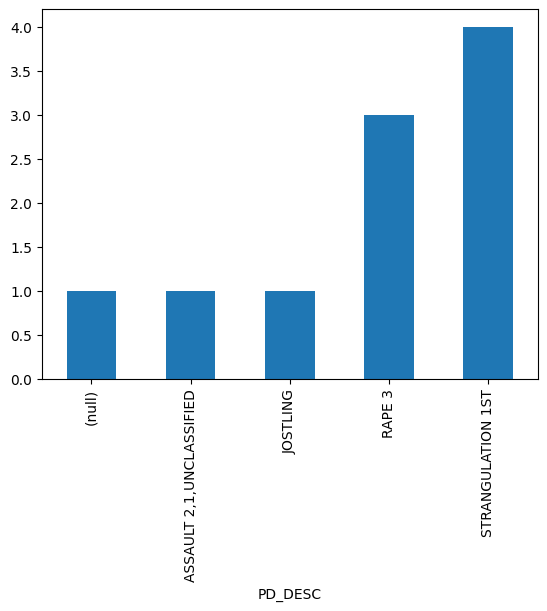

In [16]:
filtered_df = df[df['PERP_RACE'] == 'WHITE']
filtered_data_top10 = filtered_df.head(10) # Assuming you want the top 10 rows of filtered_df
bar_chart = filtered_data_top10.groupby('PD_DESC')['ARREST_PRECINCT'].count().plot(kind='bar')

In [17]:
filtered_df2 = df[df['PERP_RACE'] == 'BLACK']

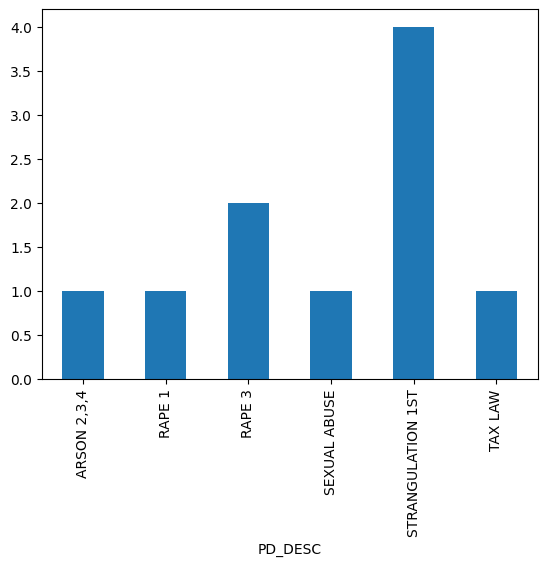

In [18]:
filtered_df3 = df[df['PERP_RACE'] == 'BLACK']
filtered_data_top10 = filtered_df3.head(10) # Assuming you want the top 10 rows of filtered_df
bar_chart = filtered_data_top10.groupby('PD_DESC')['ARREST_PRECINCT'].count().plot(kind='bar')

The analysis reveals that *in* both race catgories or white and black that the  most arrests are for Stangulation 1st in both groups

In [21]:
import matplotlib.pyplot as plt
import numpy as np

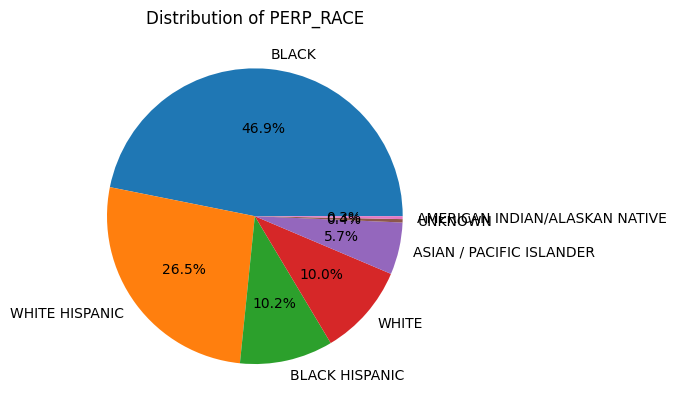

In [26]:
# Count the occurrences of each race category
race_counts = df['PERP_RACE'].value_counts()

# Create the pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
plt.title('Distribution of PERP_RACE')  # Add a title for better visualization
plt.show()

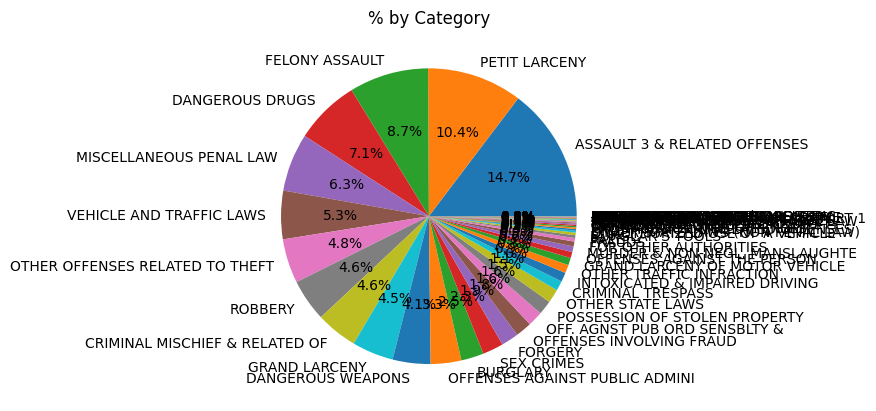

In [28]:
# Count the occurrences of each category
race_counts = df['OFNS_DESC'].value_counts()

# Create the pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')
plt.title('% by Category')
plt.show()

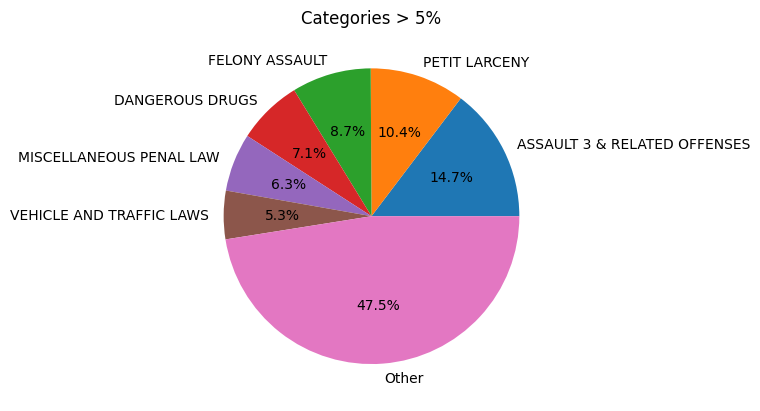

In [32]:
import matplotlib.pyplot as plt
#Created this grid because chart above was too cluttered so grouped Categories lower than % to other
# Count the occurrences of each race category
race_counts = df['OFNS_DESC'].value_counts()

# Calculate the percentage of each race category
race_percentages = race_counts / race_counts.sum() * 100

# Filter out categories less than 5% and group them as 'Other'
other_percentage = race_percentages[race_percentages < 5].sum()
main_race_percentages = race_percentages[race_percentages >= 5]
main_race_percentages['Other'] = other_percentage  # Add 'Other' category

# Create the pie chart with the modified data
plt.pie(main_race_percentages, labels=main_race_percentages.index, autopct='%1.1f%%')
plt.title('Categories > 5%')
plt.show()

The analysis reveals that Assault 3 is the highest category  